# **PRÁCTICA 6 - DISEÑO DE FILTROS**  

Esteban Álvarez Jaramillo

In [1]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
from scipy.signal import welch, firwin, filtfilt
from scipy import signal

# **4. Procedimiento**  

SciPy es un entorno de procesamiento de datos y creación de prototipos de sistemas para Python que contiene módulos para optimización, álgebra lineal integración, interpolación, FFT, procesamiento de señales e imágenes, y otras tareas para la ciencia e ingeniería.

El módulo de Procesamiento de Señales es importado así:


import scipy.signal as signal


Dentro de este módulo se encuentran comandos para la convolución, diseño de filtros, filtrado, Wavelets, análisis espectral, entre otros.

# **4.1 Creación de la señal**  

Proponga una secuencia sinusoidal 𝑥𝑒(𝑛), con 0≤𝑛≤1000, 𝐹0=0,01𝐻𝑧 y 𝐹𝑠=25𝐻𝑧. Asuma que esta señal es una señal biológica, la cual se origina por algún proceso electrofisiológico, y que se registrará sobre la superficie de la piel mediante un sistema electrónico. El viaje de la señal hipotética 𝑥𝑒(𝑛) a través de los diversos tejidos genera una atenuación en la amplitud y un retraso temporal. El efecto del sistema electrónico de registro sobre la señal de interés es la adición de ruido gaussiano a la señal. La señal registrada finalmente es de la forma:  

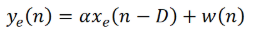

Donde α representa la amplitud, D es un retraso debido a la conducción a través de los diversos tejidos y 𝑤(𝑛) representa el ruido generado por la electrónica de los sistemas de adquisición.

- Genere las secuencias ficticias 𝑥𝑒(𝑛) y 𝑦𝑒(𝑛), implemente 𝑤(𝑛) como una secuencia de ruido Gaussiano con media cero y varianza 𝜎2=0,01, establezca 𝛼=0,8 y un retraso 𝐷=15 muestras. Grafique ambas señales. Nota: Para generar el ruido gaussiano use la función de numpy: np.random.normal.

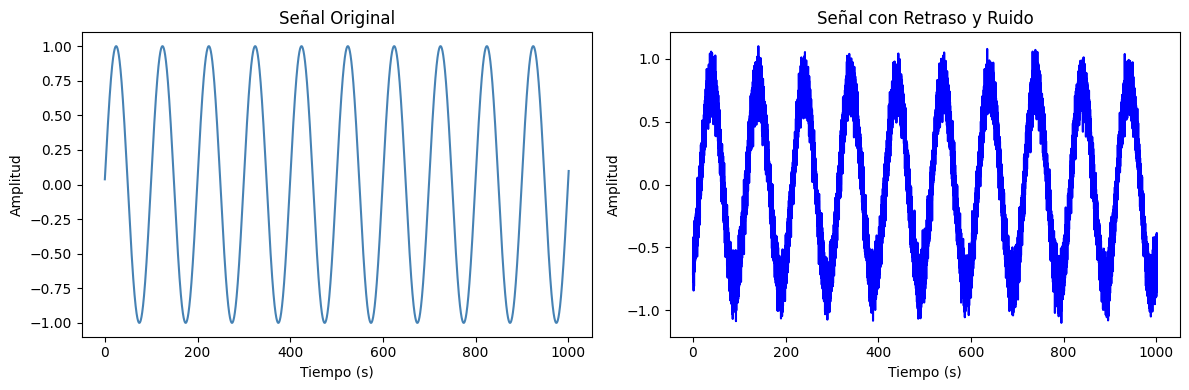

In [4]:
# Creando la señal Xe(n)
Fo = 0.01 # Frecuencia fundamental de la señal Xe(n)
Fs = 25 # Frecuencia de muestreo
n = np.arange(0,1001, 1/Fs) # Vector de la variabe independiente. En el enunciado se menciona que n se encuentra dentro de estos rangos.
Xe = np.sin(2*(np.pi)*Fo*(n+15/Fs)) # Señal biológica original.

# Creando la señal Ye(n) (retraso y atenuación de Xe)
alpha = 0.8 # Atenuación dado por el viaje de la señal Xe a través de diversos tejidos
D = 15 # Retardo induciodo por el viaje de la señal Xe a través de diversos tejidos

# Para el ruido Gaussiano
media = 0;
varianza = 0.01
std = np.sqrt(varianza)
w = np.random.normal(loc=media, scale=std, size=len(n)) #Secuencia de ruido gaussiano.

# Obteniendo la señal final de la forma: y_e (n)=α*Xe(n-D)+w(n)

Xe_Retardo = np.sin(2*(np.pi)*Fo*(n-D)) # Señal Xe retrasada en D muestras
Ye = alpha*Xe_Retardo + w

# Graficando las señales Xe(n, Ye(n) y el W
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(n, Xe, color="steelblue")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.title("Señal Original")

plt.subplot(1, 2, 2)
plt.plot(n, Ye, color="blue")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.title("Señal con Retraso y Ruido")

plt.tight_layout()  # Ajusta el espaciado entre los subplots
plt.show()

# **4.2 Diseño de un filtro**  

La función firwin permite diseñar un filtro FIR utilizando el método de ventanas, donde los principales argumentos de entrada son N: Orden del filtro y 𝑊𝑛: Frecuencia de corte. Para filtros digitales 𝑊𝑛 está normalizado entre 0 y 1, donde 1 es la frecuencia de Nyquist que es igual a la mitad de la frecuencia de muestreo de la señal. 𝑊𝑛 es igual a la frecuencia de corte del filtro dividido la frecuencia de Nyquist.

- Diseñe un filtro FIR pasa bajas para la señal 𝑦𝑒(𝑛), con una frecuencia de corte de 1.25 muestras/s y orden 30.

- ¿Qué cambios hay en los argumentos de la función para implementar un filtro pasa banda y pasa altas? Pruebe con una frecuencia de corte adicional de 7.5 muestras/s.

Nota: Resultado esperado diseño de 3 filtros FIR (pasa bajas, pasa altas y pasa banda)

La función iirfilter permite diseñar un filtro IIR.

- Diseñe un filtro IIR en las mismas condiciones de los puntos anteriores. Compare cambios.

Nota: Resultado esperado diseño de 3 filtros IIR (pasa bajas, pasa altas y pasa banda)

### **Diseñe un filtro FIR pasa bajas para la señal 𝑦𝑒(𝑛), con una frecuencia de corte de 1.25 muestras/s y orden 30.**

In [5]:
order_FIR = 30 # orden calculado segun requerimientos
nyquist = Fs/2 # frecuencia de nyquist
wn_l = 1.25/nyquist #frecuencia de corte normalizada respecto nyquist
lowpass = signal.firwin(order_FIR+1,wn_l, pass_zero = 'lowpass',window='hamming') #filtro
FIR_lowpass = signal.filtfilt(b=lowpass,a=1,x=Ye) # aplicación del filtro

**Diseño de filtro pasa altas**

In [6]:
wn_h = 7.5/nyquist #frecuencia de corte normalizada respecto nyquist
highpass = signal.firwin(order_FIR+1,wn_h, pass_zero = 'highpass',window='hamming') #filtro
FIR_highpass = signal.filtfilt(b=highpass,a=1,x=Ye) # aplicación del filtro

**Diseño de filtro pasa bandas**

In [7]:
bandpass = signal.firwin(order_FIR+1,[wn_l,wn_h], pass_zero = 'bandpass',window='hamming') #filtro
FIR_bandpass = signal.filtfilt(b=bandpass,a=1,x=Ye) # aplicación del filtro

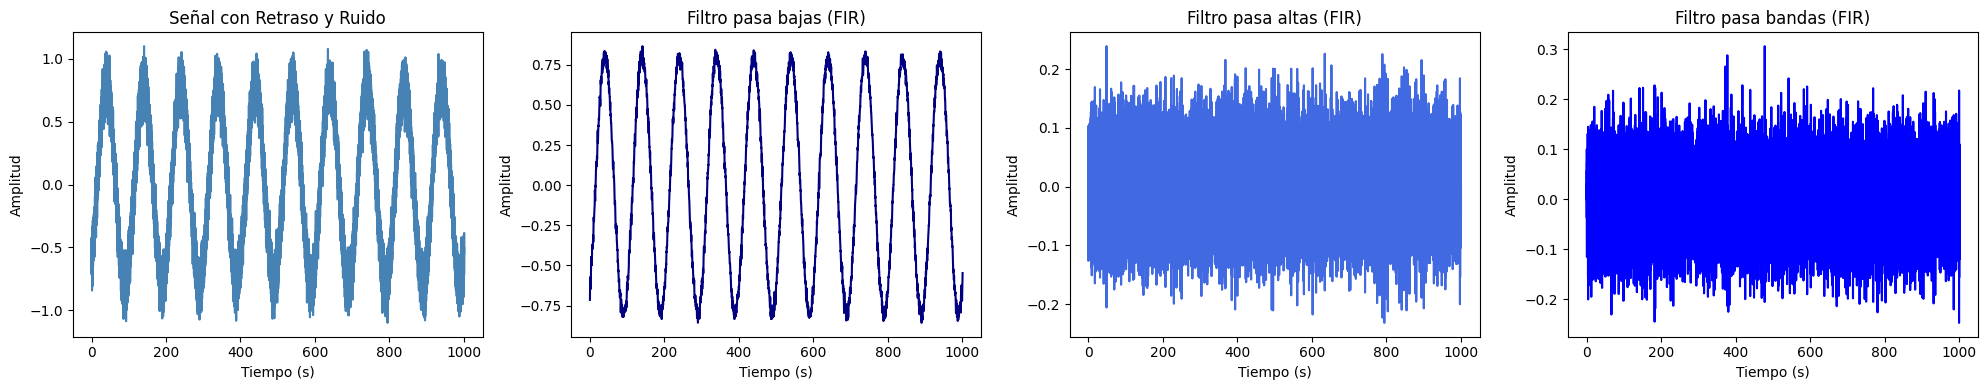

In [9]:
plt.figure(figsize=(20, 4))

plt.subplot(1, 4, 1)
plt.plot(n, Ye, color='steelblue')
plt.title('Señal con Retraso y Ruido')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

plt.subplot(1, 4, 2)
plt.plot(n,FIR_lowpass, color="navy")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.title("Filtro pasa bajas (FIR)")

plt.subplot(1, 4, 3)
plt.plot(n,FIR_highpass, color="royalblue")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.title("Filtro pasa altas (FIR)")

plt.subplot(1, 4, 4)
plt.plot(n,FIR_bandpass, color="blue")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.title("Filtro pasa bandas (FIR)")

plt.tight_layout()
plt.show()

**¿Qué cambios hay en los argumentos de la función para implementar un filtro pasa banda y pasa altas? Pruebe con una frecuencia de corte adicional de 7.5 muestras/s.**  

Al implementar un filtro pasa altas o pasa bandas, se debe modificar el argumento pass_zero por 'highpass' o 'bandpass' según los requerimientos. Adicionalmente, para el diseño del filtro pasa bandas el argumento 'cutoff' recibe una matriz con las 2 frecuencias de corte determinadas (band edges)

### **Diseñe un filtro IIR en las mismas condiciones de los puntos anteriores. Compare cambios.**  

Ya que los filtros IIR funcionan con un orden mucho menor que los filtros FIR, se modificó el orden estableciéndolo igual a 16.

In [10]:
order_IIR = 16 # orden calculado segun requerimientos
nyquist = Fs/2 # frecuencia de nyquist
wn_l = 1.25/nyquist #frecuencia de corte normalizada respecto nyquist

**Diseño de un filtro IIR pasa bajas para la señal Ye(n)**

In [11]:
b_low, a_low = signal.iirfilter(order_IIR, wn_l, btype='low', analog=False, ftype='butter')
IIR_lowpass = signal.filtfilt(b_low, a_low, Ye)

**Diseño de un filtro IIR pasa altas para la señal Ye(n)**

In [12]:
b_high, a_high= signal.iirfilter(order_IIR, wn_h, btype='high', analog=False, ftype='butter')
IIR_highpass = signal.filtfilt(b_high, a_high, Ye)

**Diseño de un filtro IIR pasa bandas para la señal Ye(n)**

In [13]:
b_band, a_band= signal.iirfilter(order_IIR, [wn_l,wn_h], btype='band', analog=False, ftype='butter')
IIR_passband = signal.filtfilt(b_band, a_band, Ye)

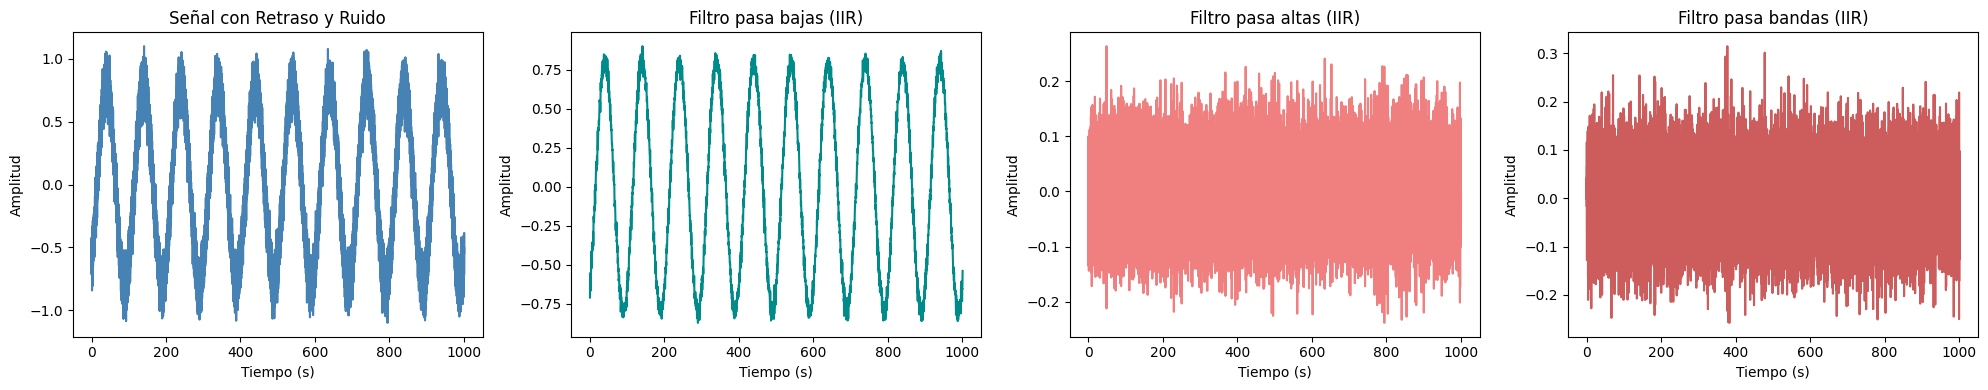

In [16]:
plt.figure(figsize=(20, 4))

plt.subplot(1, 4, 1)
plt.plot(n, Ye, color='steelblue')
plt.title('Señal con Retraso y Ruido')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

plt.subplot(1, 4, 2)
plt.plot(n,IIR_lowpass, color="darkcyan")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.title("Filtro pasa bajas (IIR)")

plt.subplot(1, 4, 3)
plt.plot(n,IIR_highpass, color="lightcoral")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.title("Filtro pasa altas (IIR)")

plt.subplot(1, 4, 4)
plt.plot(n,IIR_passband, color="indianred")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.title("Filtro pasa bandas (IIR)")

plt.tight_layout()
plt.show()

### **Comparación**

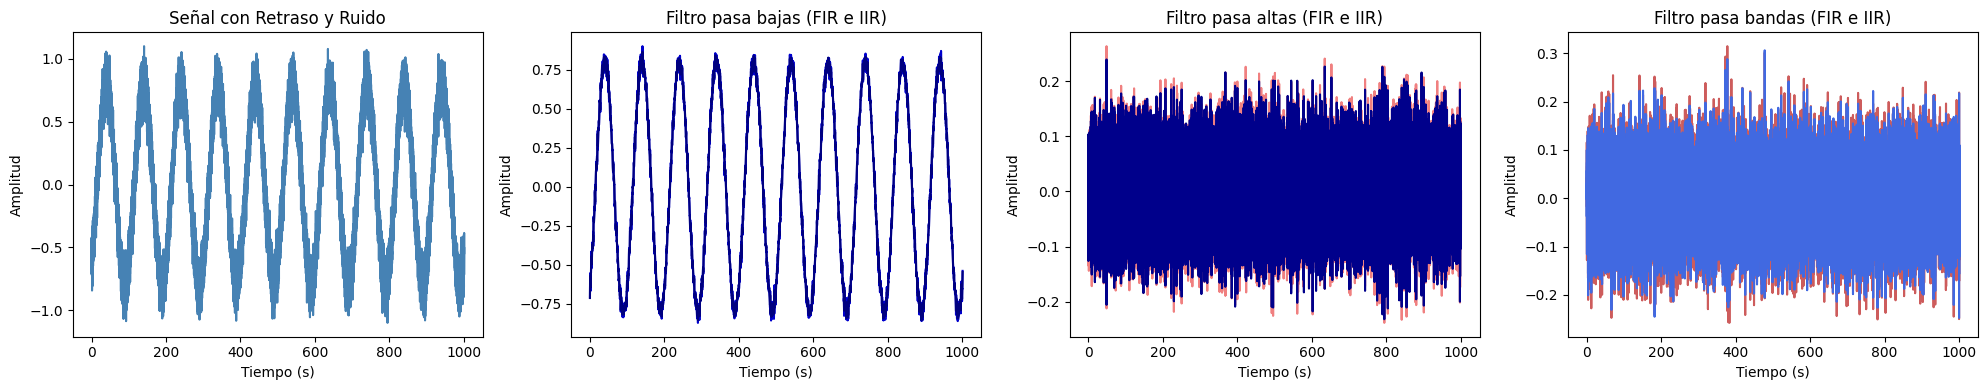

In [18]:
plt.figure(figsize=(20, 4))

plt.subplot(1, 4, 1)
plt.plot(n, Ye, color='steelblue')
plt.title('Señal con Retraso y Ruido')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

plt.subplot(1, 4, 2)
plt.plot(n,IIR_lowpass, color="mediumblue")
plt.plot(n,FIR_lowpass, color="navy")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.title("Filtro pasa bajas (FIR e IIR)")

plt.subplot(1, 4, 3)
plt.plot(n,IIR_highpass, color="lightcoral")
plt.plot(n,FIR_highpass, color="darkblue")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.title("Filtro pasa altas (FIR e IIR)")

plt.subplot(1, 4, 4)
plt.plot(n,IIR_passband, color="indianred")
plt.plot(n,FIR_bandpass, color="royalblue")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.title("Filtro pasa bandas (FIR e IIR)")

plt.tight_layout()
plt.show()

Como se puede observar, en el dominio del tiempo las diferencias entre los filtros FIR e IIR no son perceptibles. Por esta razón, se hará la comparación de cambios en el dominio de la frecuencia utilizando el Diagrama de Bode.

In [19]:
def mfreqz(b,a,order,nyq_rate = 1):

    """
    Plot the impulse response of the filter in the frequency domain

    Parameters:

        b: numerator values of the transfer function (coefficients of the filter)
        a: denominator values of the transfer function (coefficients of the filter)

        order: order of the filter

        nyq_rate = nyquist frequency
    """

    w,h = signal.freqz(b,a);
    h_dB = 20 * np.log10 (abs(h));

    plt.figure(figsize=(20,4));
    plt.subplot(131);
    plt.plot((w/max(w))*nyq_rate,abs(h));
    plt.ylabel('Magnitude');
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)');
    plt.title(r'Frequency response. Order: ' + str(order));
    [xmin, xmax, ymin, ymax] = plt.axis();
    plt.grid(True);

    plt.subplot(132);
    plt.plot((w/max(w))*nyq_rate,h_dB);
    plt.ylabel('Magnitude (db)');
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)');
    plt.title(r'Frequency response. Order: ' + str(order));
    plt.grid(True)
    plt.grid(True)


    plt.subplot(133);
    h_Phase = np.unwrap(np.arctan2(np.imag(h),np.real(h)));
    plt.plot((w/max(w))*nyq_rate,h_Phase);
    plt.ylabel('Phase (radians)');
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)');
    plt.title(r'Phase response. Order: ' + str(order));
    plt.subplots_adjust(hspace=0.5);
    plt.grid(True)
    plt.tight_layout()
    plt.show()

**Pasa bajas IIR Y FIR**

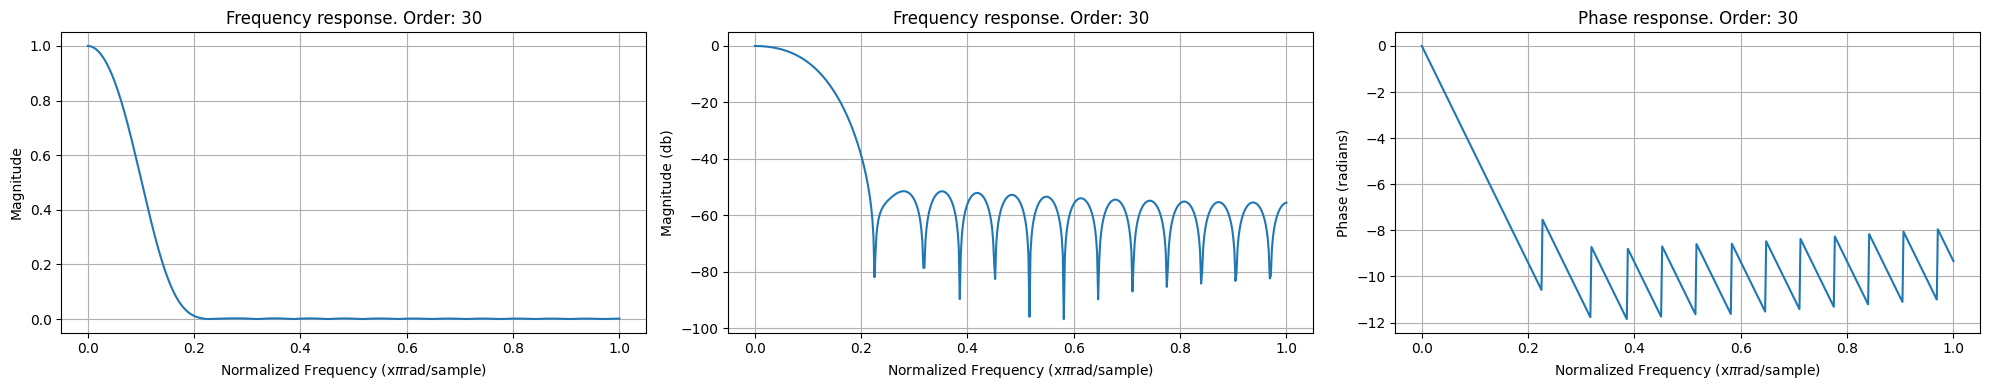

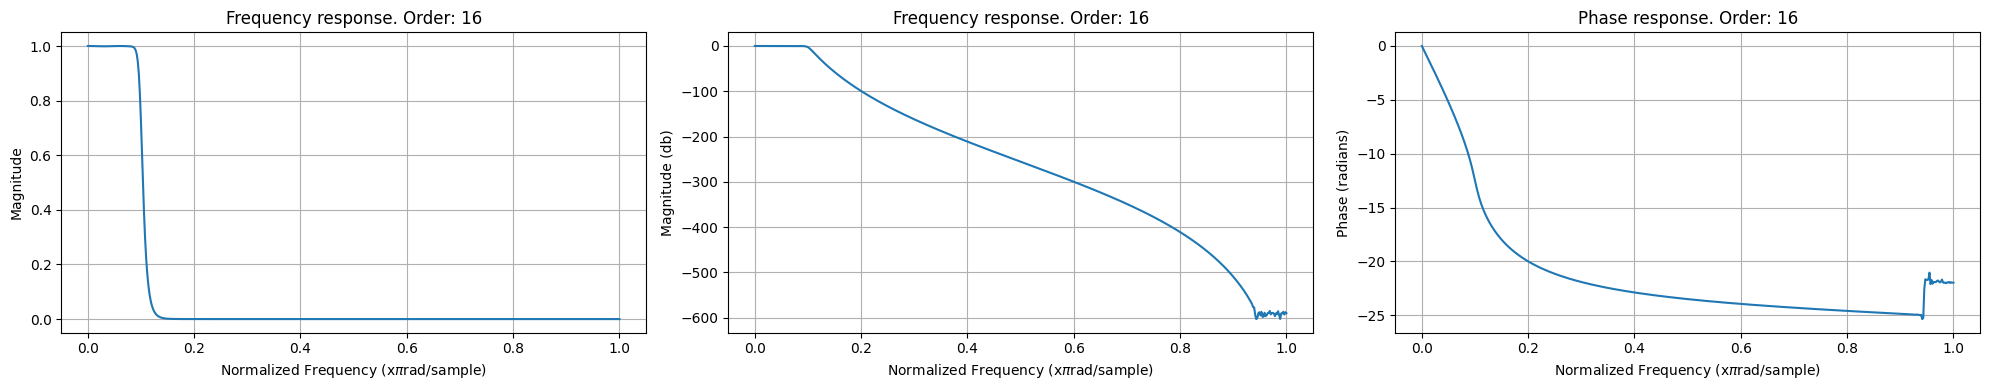

In [20]:
mfreqz(lowpass, 1, 30) #FIR
mfreqz(b_low, a_low, 16) #IIR

**Pasa altas IIR y FIR**

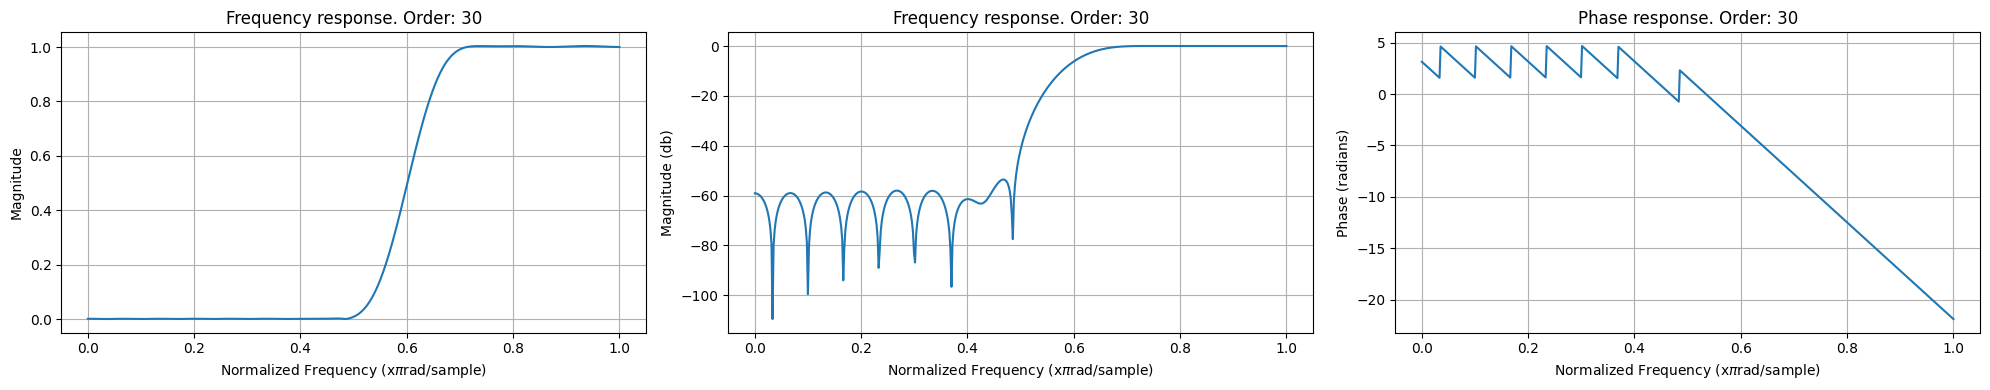

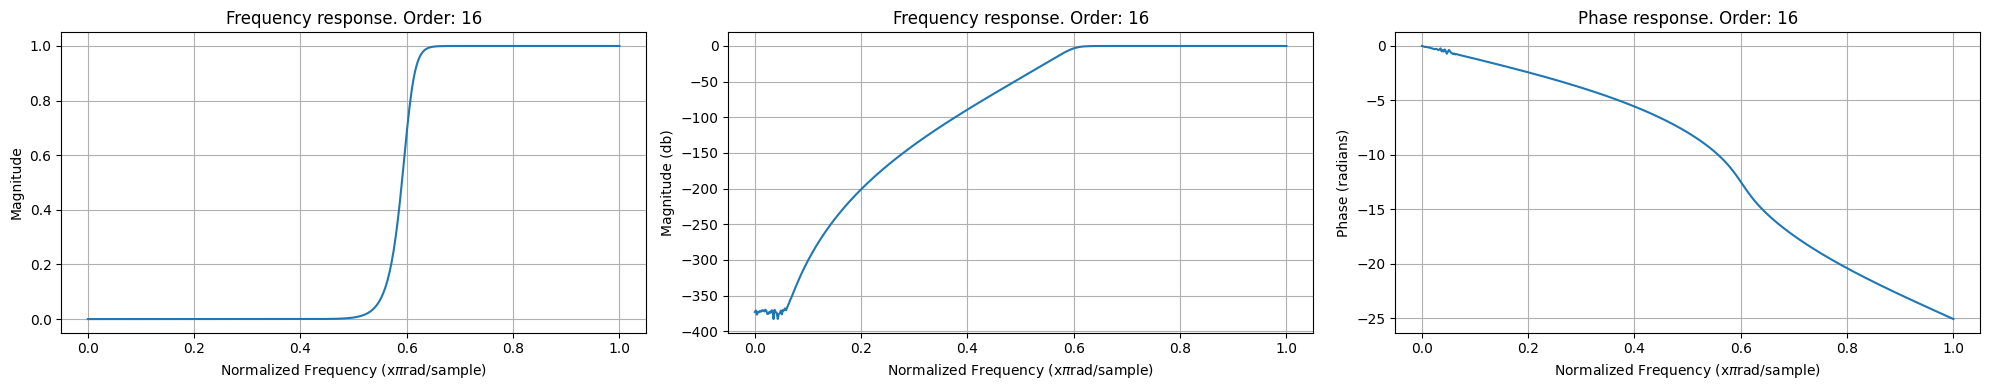

In [21]:
mfreqz(highpass, 1, 30) #FIR
mfreqz(b_high, a_high, 16) #IIR

**Pasa bandas IIR y FIR**

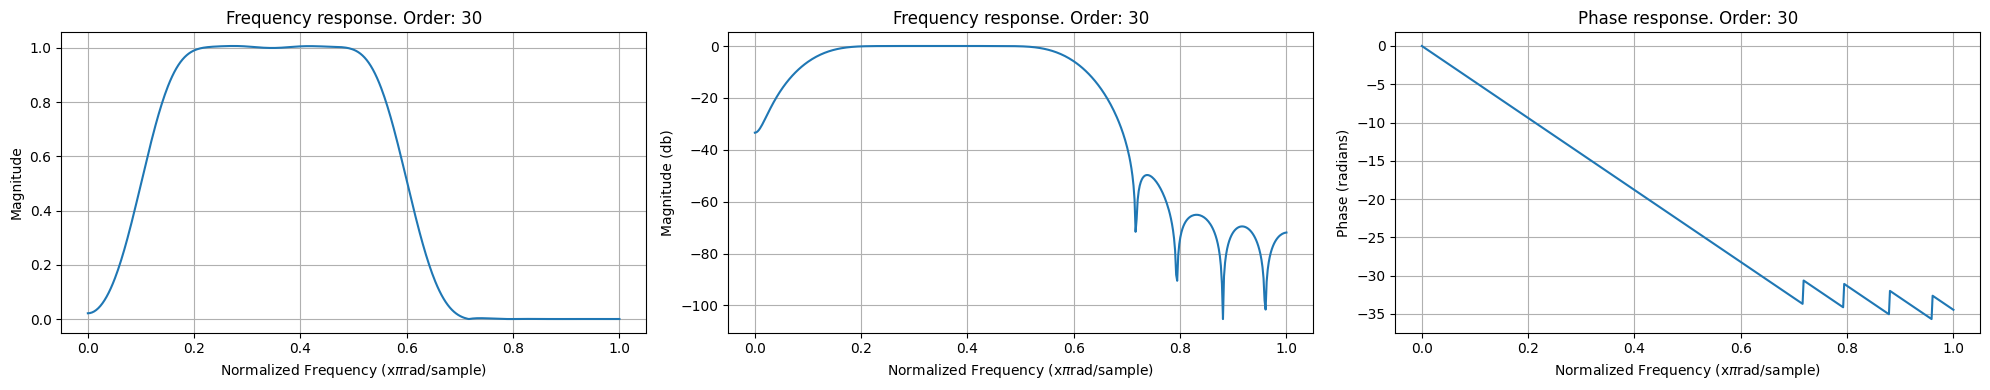

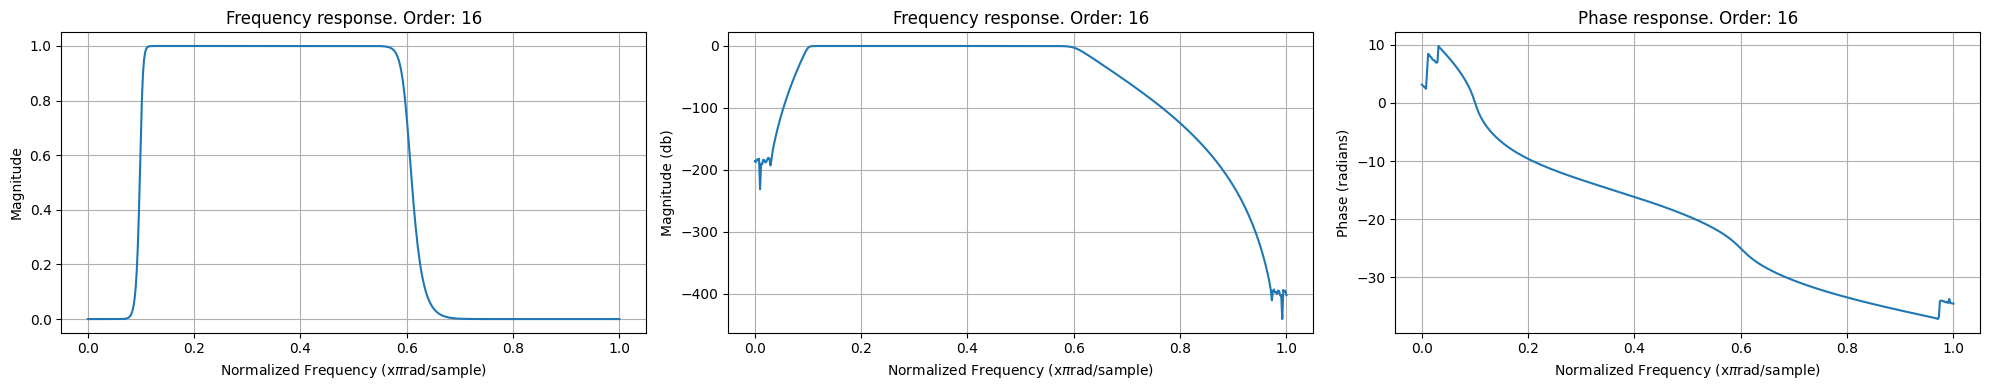

In [22]:
mfreqz(bandpass, 1, 30) #FIR
mfreqz(b_band, a_band, 16) #IIR

A partir de los diagramas de Bode obtenidos, se observa que los filtros FIR presentan una pendiente de atenuación más gradual en la banda de transición, mientras que los filtros IIR muestran una caída mucho más pronunciada, lo que permite una separación de frecuencias más marcada. Además, los FIR destacan por su alta estabilidad debido a que su fase varía de forma prácticamente lineal con la frecuencia; esto implica que todas las componentes frecuenciales sufren el mismo retraso temporal. Esta estabilidad proviene de la ausencia de retroalimentación, lo que evita que el sistema se torne inestable ante cualquier señal de entrada, siendo especialmente útil en aplicaciones donde es fundamental conservar la forma original de la señal y reducir distorsiones de fase, como ocurre con señales biológicas.

Por otro lado, en los filtros IIR, la presencia de rutas de retroalimentación introduce inestabilidad numérica, la cual se manifiesta como curvaturas en la respuesta de fase, indicando que ésta no es lineal respecto a la frecuencia. También aparecen picos de resonancia que afectan tanto la fase como la magnitud dentro de la banda de paso. Asimismo, puede notarse que los IIR presentan un rizado más pronunciado en la banda de rechazo en comparación con los FIR. [1] [2]

# **4.3. Filtrado**  

Las funciones lfilter y filtfilt filtran una secuencia de información 𝑥(𝑛) usando un filtro IIR o FIR.

- Pruebe dichos comandos utilizando la información entregada por el filtro pasa bajas FIR implementado anteriormente y la señal 𝑦𝑒(𝑛) ¿Por qué se utiliza sólo el numerador? ¿A qué hace referencia el numerador? ¿Evidencia cambios en el uso de las funciones de filtrado? ¿Cómo se puede explicar la falta de coincidencia? ¿Es adecuado el orden del filtro usado? Analice.

- Pruebe dichos comandos utilizando la información entregada por el filtro pasa bajas IIR implementado anteriormente y la señal 𝑦𝑒(𝑛) ¿Por qué se utiliza el numerador y denominador? ¿Es necesario cambiar el orden del filtro? En tal caso hágalo y analice.

### **Prueba de los comandos para FIR pasa bajas**

In [23]:
# Filtrado con el filtro pasa bajas FIR utilizando lfilter
FIR_lfilter = signal.lfilter(lowpass, 1, Ye)

# Filtrado con el filtro pasa bajas FIR utilizando filtfilt
FIR_filtfilt = signal.filtfilt(lowpass, 1, Ye)

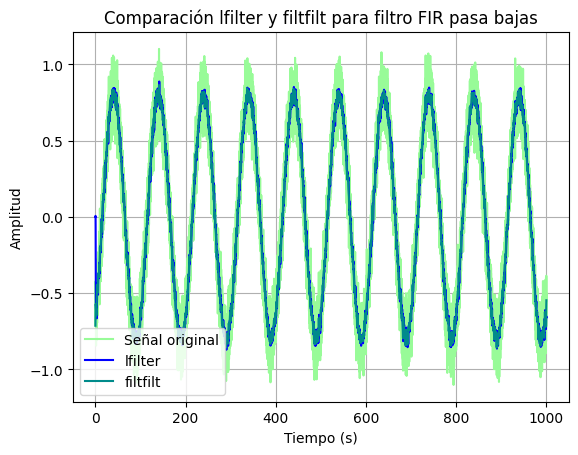

In [29]:
plt.plot(n, Ye, label='Señal original', color="palegreen")  # Señal original
plt.plot(n, FIR_lfilter, label='lfilter', color="blue")  # Señal filtrada con lfilter
plt.plot(n, FIR_filtfilt, label='filtfilt', color="darkcyan")  # Señal filtrada con filtfilt
plt.title('Comparación lfilter y filtfilt para filtro FIR pasa bajas')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

**¿Por qué se utiliza sólo el numerador?**  

Si se parte de la ecuación de diferencias:  

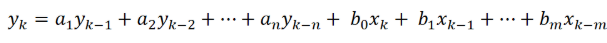

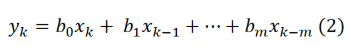

El diseño de los filtros FIR está basado en una estructura de convolución sin retroalimentación. La salida de los filtros FIR depende únicamente de los valores de entrada actuales y pasados, es decir, no utilizan valores de salida anteriores para calcular su salida actual. Esto lo podemos observar en la ecuación (2), donde yx[k] corresponden a los valores de entrada, y no se tienen valores de salida y[n], debido a que en este caso todos los coeficientes a0 son igual a 0. Estos valores son ponderados por los coeficientes b0 del filtro, los cuales corresponden al numerador de la función de transferencia del filtro. Es por esta razón que el denominador (el cual representa la retroalimentación) es igual a 1 en los filtros FIR. [2] [6]

**¿A qué hace referencia el numerador?**


El numerador hace referencia a los coeficientes aplicados a los valores de entrada de la señal, que representan los términos del numerador en la función de transferencia del filtro e indica cómo el filtro responde a un impulso unitario en la entrada.

**¿Evidencia cambios en el uso de las funciones de filtrado FIR?**

En teoría, el filtrado obtenido puede presentar diferencias dependiendo de si se emplea lfilter o filtfilt. La función lfilter puede generar un desfase en la señal, ya que realiza el procesamiento recorriéndola únicamente en una dirección. Esto provoca una acumulación de retrasos, pues en ciertos instantes la salida depende solo de muestras pasadas de la entrada [3]. En contraste, filtfilt aplica el filtrado hacia adelante y luego hacia atrás (primero de inicio a fin y luego en sentido inverso), lo que reduce significativamente el desfase producido por el proceso [4]. En el filtrado realizado, la única diferencia observable aparece en el pico inicial introducido por lfilter.

**¿Es adecuado el orden del filtro usado?**

Podría decirse que el orden de filtro empleado es adecuado, de acuerdo a lo observado en el diagrama de Bode, donde se ve cómo se logra atenuar las frecuencias superiores a la frecuencia de corte. Asimismo, al verla señal filtrada en el dominio del tiempo se evidencia la disminución del ruido de alta frecuencia.

### **Prueba de los comandos para IIR pasa bajas**

In [32]:
# Filtrado con el filtro pasa bajas IIR utilizando lfilter
IIR_lfilter = signal.lfilter(b_low, a_low, Ye)
# Filtrado con el filtro pasa bajas IIR utilizando filtfilt
IIR_filtfilt = signal.filtfilt(b_low, a_low, Ye)

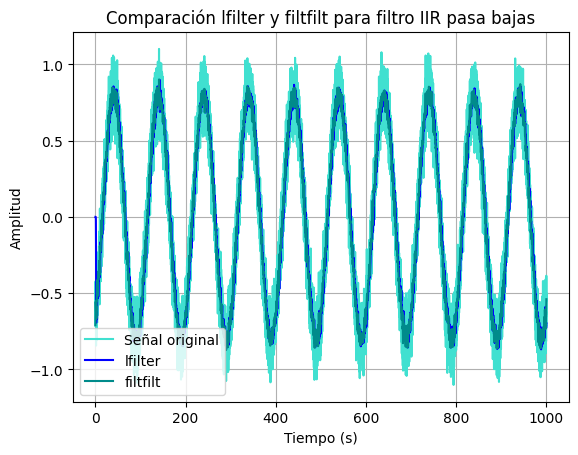

In [34]:
plt.plot(n, Ye, label='Señal original', color="turquoise")  # Señal original
plt.plot(n, IIR_lfilter, label='lfilter', color="blue")  # Señal filtrada con lfilter
plt.plot(n, IIR_filtfilt, label='filtfilt', color="darkcyan")  # Señal filtrada con filtfilt
plt.title('Comparación lfilter y filtfilt para filtro IIR pasa bajas')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

**¿Por qué se utiliza el numerador y denominador?**  

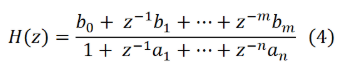

En los filtros IIR, la respuesta al impulso es de duración infinita. Esto ocurre porque, además del numerador, también interviene el denominador de la función de transferencia, donde aparecen los coeficientes a(n). En este caso dichos coeficientes son distintos de cero, lo que permite incorporar retroalimentación; por ello, la salida del filtro depende no solo de las muestras de entrada, sino también de salidas anteriores. Esta característica de respuesta infinita le otorga al filtro la capacidad de representar ciertas frecuencias usando menos coeficientes que un filtro FIR [5].

Desde el punto de vista teórico, aumentar el orden del filtro mejora su aproximación a la frecuencia de corte buscada y proporciona una mayor atenuación. Sin embargo, también puede incrementar el desfase e introducir inestabilidad tanto en la banda de paso como en la de rechazo. Por esta razón, se modifica el orden del filtro con el fin de analizar cómo cambia su comportamiento.

**¿Es necesario cambiar el orden del filtro? En tal caso hágalo y analice.**

Se considera que la atenuación y el comportamiento del filtro IIR pasa bajas es adecuado. No obstante, con propósitos de probar sus comportamientos ante un orden de filtro menor, se harán modificicaciones, reduciéndolo tanto para el filtro IIR como para el filtro FIR, teniendo un orden de 8 y de 15, respectivamente.

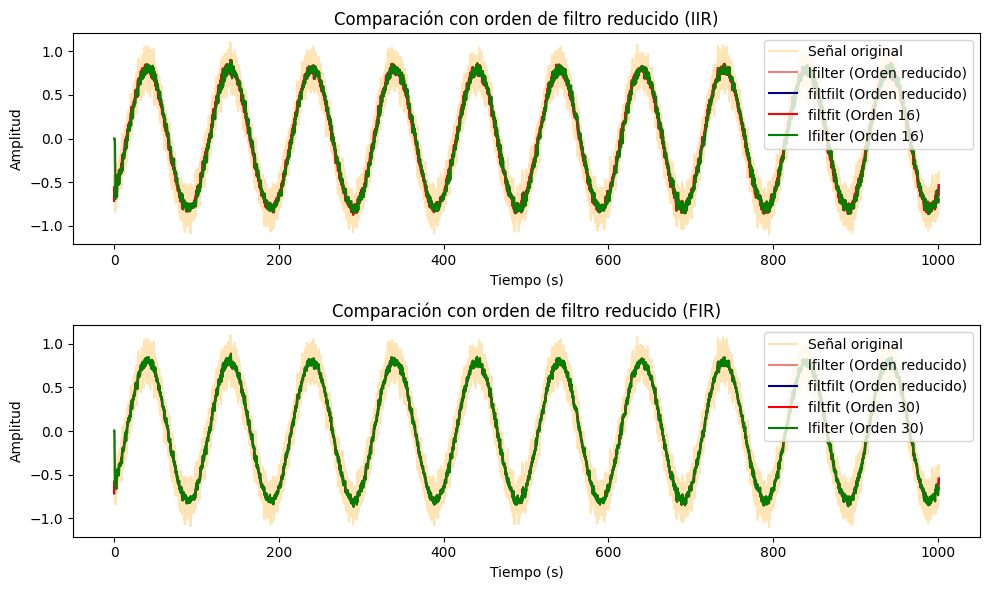

In [44]:
b_low_new, a_low_new = signal.butter(order_IIR/2, wn_l, 'lowpass')

IIR_lfilter_new = signal.lfilter(b_low_new, a_low_new, Ye)
IIR_filtfilt_new = signal.filtfilt(b_low_new, a_low_new, Ye)

b_low_new_2, a_low_new_2 = signal.butter(order_FIR/2, wn_l, 'lowpass')

FIR_lfilter_new = signal.lfilter(lowpass,1, Ye)
FIR_filtfilt_new = signal.filtfilt(lowpass,1, Ye)

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(n, Ye, label='Señal original',  color="moccasin")  # Señal original
plt.plot(n, IIR_lfilter_new, label = 'lfilter (Orden reducido)',  color="lightcoral")
plt.plot(n, IIR_filtfilt_new, label = 'filtfilt (Orden reducido)',  color="darkblue")
plt.plot(n, IIR_filtfilt, label = 'filtfit (Orden 16)', color='red')
plt.plot(n, IIR_lfilter, label = 'lfilter (Orden 16)', color='green')
plt.title('Comparación con orden de filtro reducido (IIR)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(n, Ye, label='Señal original',  color="moccasin")  # Señal original
plt.plot(n, FIR_lfilter_new, label='lfilter (Orden reducido)',  color="lightcoral")
plt.plot(n, FIR_filtfilt_new, label='filtfilt (Orden reducido)',  color="darkblue")
plt.plot(n, FIR_filtfilt, label = 'filtfit (Orden 30)', color='red')
plt.plot(n, FIR_lfilter, label = 'lfilter (Orden 30)', color='green')
plt.title('Comparación con orden de filtro reducido (FIR)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()

plt.tight_layout()
plt.show()

Como se mencionó anteriormente, en el dominio del tiempo no se observan con claridad las diferencias en los resultados de los filtros al disminuir su orden. Se procede a hacer un análisis con el diagrama de Bode, para un orden mayor y un orden menor, para ambos filtros (FIIR e IIR)

**Análisis variación en el orden del filtro para FIR**

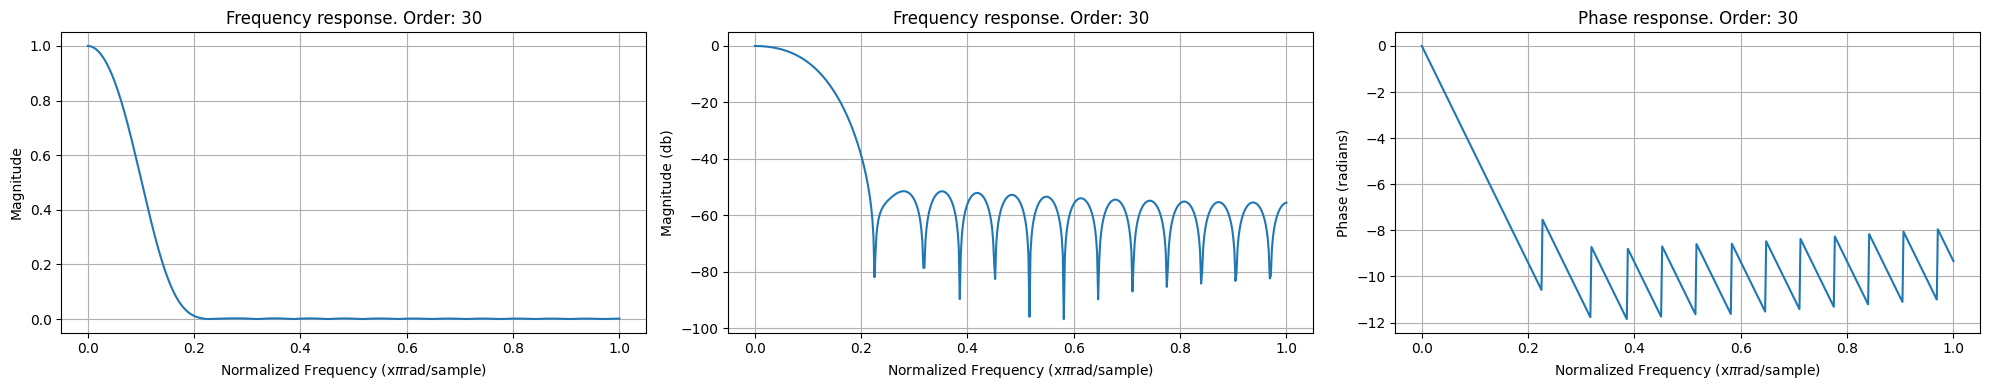

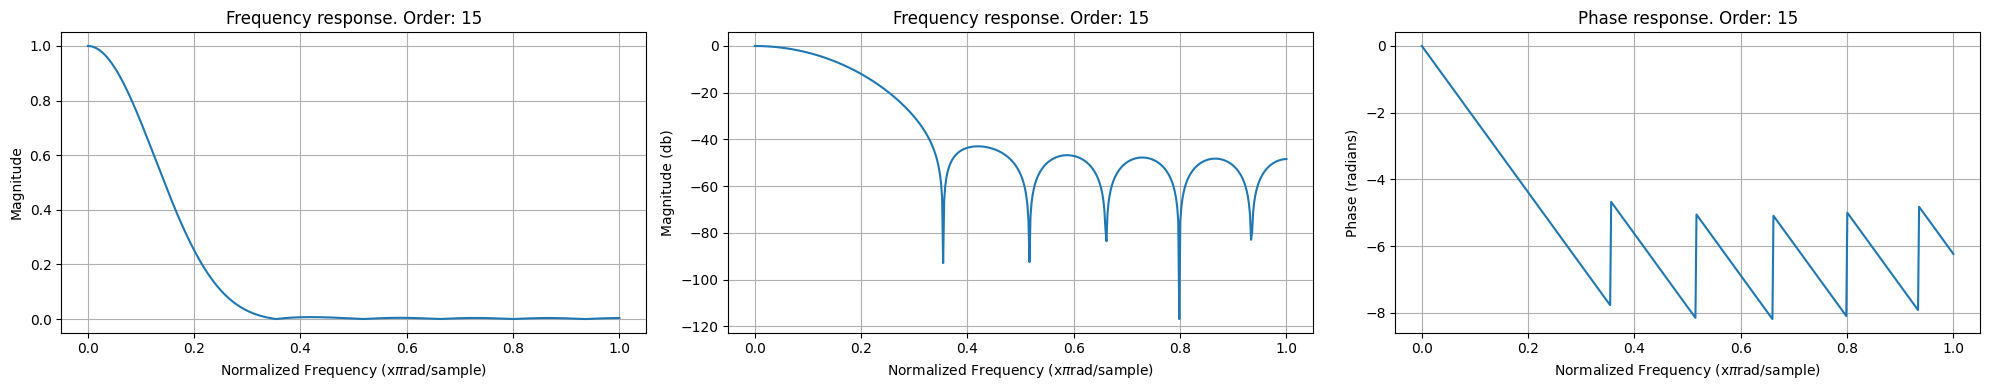

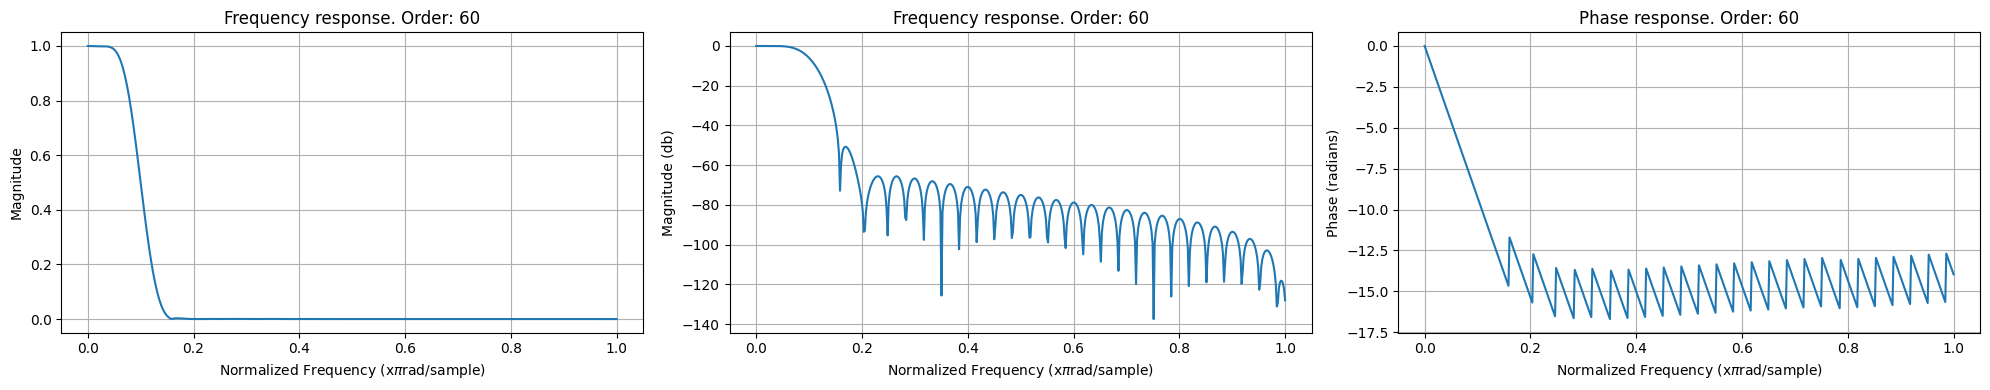

In [45]:
lowpass_2 = signal.firwin(15, wn_l, pass_zero = 'lowpass',window='hamming') #filtro
lowpass_3 = signal.firwin(60, wn_l, pass_zero = 'lowpass',window='hamming') #filtro

mfreqz(lowpass, 1, 30) #FIR orden 30
mfreqz(lowpass_2, 1, 15) #FIR orden 15
mfreqz(lowpass_3, 1, 60) #FIR orden 60

Conceptualmente, aumentar el orden de un filtro permite lograr una aproximación más precisa a la frecuencia de corte deseada y obtener una mayor atenuación. Sin embargo, este incremento también puede provocar más desfase y generar inestabilidad tanto en la banda de paso como en la de rechazo; por ello se opta por modificar el orden del filtro. En cuanto a los FIR, se aprecia que al elevar su orden la separación entre la banda de paso y la banda de rechazo se vuelve más marcada. Esta pendiente más abrupta indica un mejor desempeño del filtrado. De esta manera, se evidencia que en los FIR es necesario un orden más alto para preservar mejor las señales dentro de la banda de paso y lograr una atenuación más efectiva de las que se encuentran por fuera, pues con órdenes bajos la transición entre bandas resulta más gradual.

**Análisis de variación en el orden del filtro para IIR**

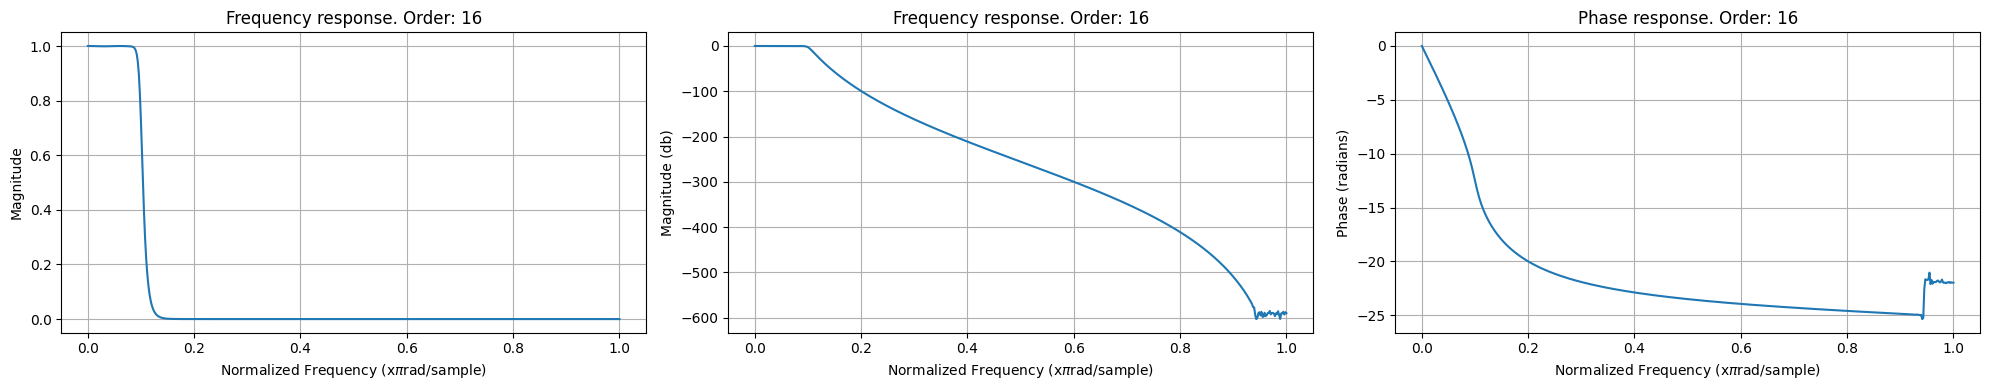

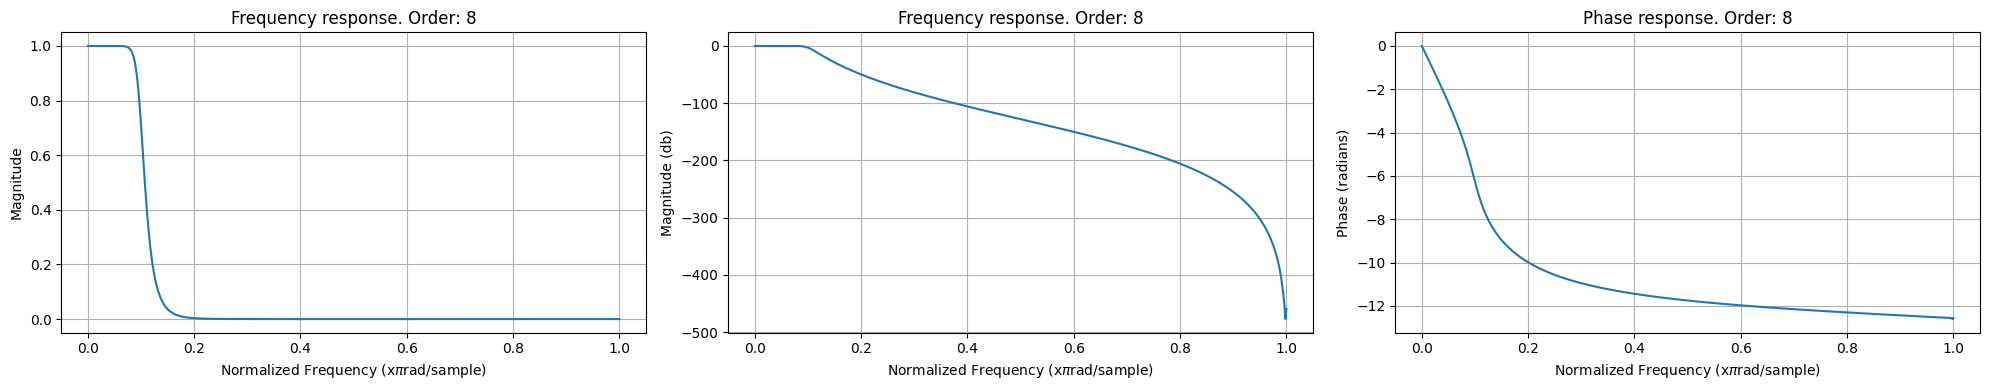

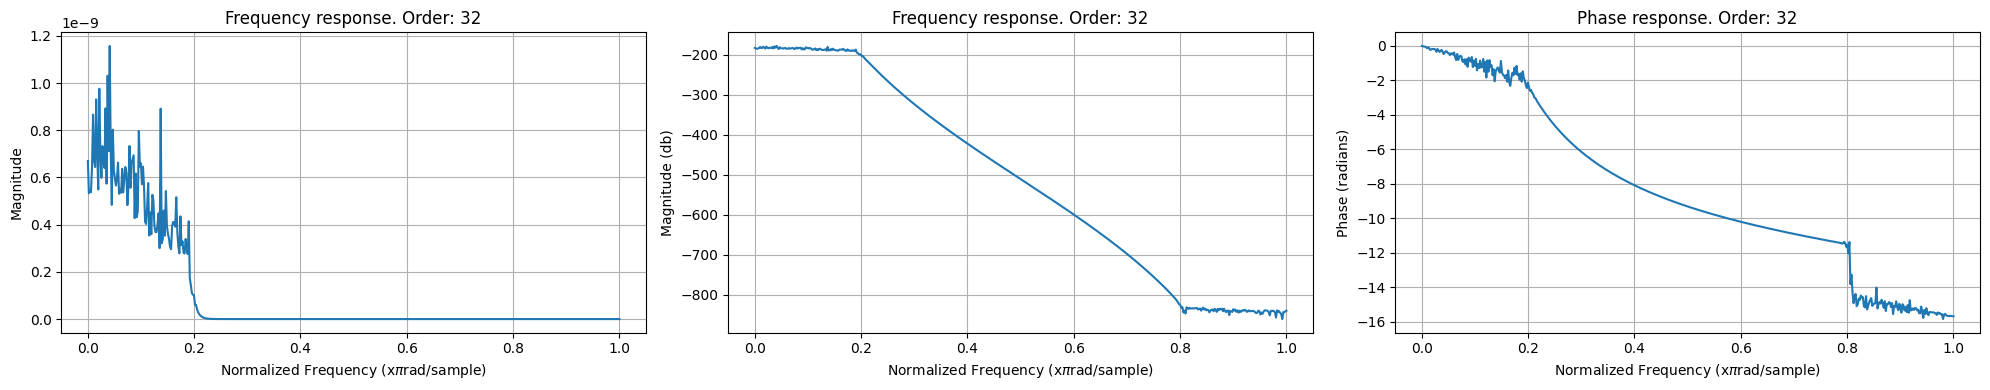

In [46]:
mfreqz(b_low, a_low, 16) #IIR

b_low_2, a_low_2 = signal.iirfilter(8, wn_l, btype='low', analog=False, ftype='butter')
b_low_3, a_low_3 = signal.iirfilter(32, wn_l, btype='low', analog=False, ftype='butter')
mfreqz(b_low_2, a_low_2, 8) #IIR
mfreqz(b_low_3, a_low_3, 32) #IIR

En el caso del IIR, podemos observar que al disminuir el orden a 8, el filtro tiene un comportamiento más adecuado, se eliminan los picos de resonancia que se observaban al utilizar un orden de filtro igual a 16, demostrando que el filtrado es más eficiente a un orden más bajo, y emplear un orden más elevado puede aumentar el desfase y generar mayor inestabilidad en la banda de baso.

# **4.4 Aplicación**  

Cargue la señal señal_filtros.txt adquirida a una frecuencia de muestreo de 500 Hz. Extraiga y trabaje con el canal 1 de la señal.

- Realice un análisis frecuencial con la función que permite calcular el periodograma de Welch de una señal ¿Hay presencia de ruido eléctrico? Analice.

- Diseñe un filtro FIR que permita eliminar el ruido de la señal. Grafique. Luego verifique nuevamente el comportamiento en frecuencia (periodograma de Welch de la señal filtrada) ¿Hay cambios? Analice.

- Grafique un segmento de las señales antes y después de filtrar, analice los cambios.

In [51]:
import os
directorio_actual = os.getcwd()
archivo = directorio_actual + "/senal_filtros.txt"
senal = np.loadtxt(archivo)
senal_C1 = senal[:,0] #Extracción de la señal del canal 1
fs= 500 #Frecuencia de muestreo
print(f'La señal tiene un total de {len(senal_C1)} muestras')

La señal tiene un total de 60000 muestras


### **Análisis frecuencial**

In [52]:
nperseg = 1024 # Ancho de la ventana, nperseg no debe ser mayor que la longitud de la señal
noverlap = int(nperseg / 2)  # Solapamiento de las ventanas del 50%
ventana = np.hanning(nperseg)  # Ventana Hanning
# Calcular el periodograma de Welch
f, power = welch(senal_C1, fs, window=ventana, nperseg=nperseg, noverlap=noverlap)

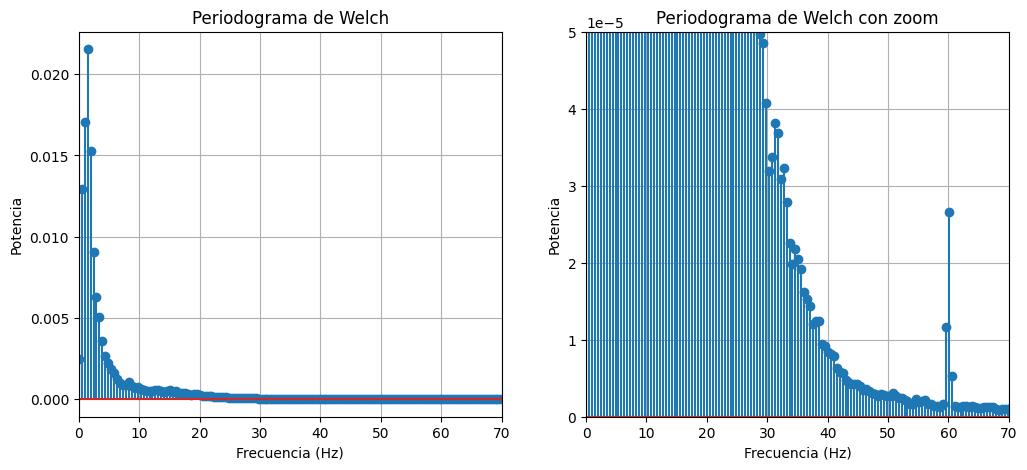

In [53]:
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plt.stem(f, power)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia')
plt.title('Periodograma de Welch')
plt.grid(True)
plt.xlim(0, 70)

plt.subplot(1,2,2)
plt.stem(f, power)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia')
plt.title('Periodograma de Welch con zoom')
plt.grid(True)
plt.xlim(0,70)
plt.ylim(0,0.00005)
plt.show()

Al observar el periodograma de Welch (gráfico a la izquierda) se puede evidenciar la presencia de ruido como un pico de baja a una frecuencia dentro del rango de 50/60Hz, que se visualiza como un salto en el gráfico. Se realiza zoom para observar con mayor detalle el pico y concluir la presencia del ruido eléctrico en la señal (gráfico de la derecha), que se encuentra dentro del rango de 57 a 60 Hz, aproximadamente.

### **Diseñe un filtro FIR que permita eliminar el ruido de la señal**  

Se estableció un orden de 110 ya que fue el orden en que se logró visualizar una máxima reducción del ruido.

In [54]:
fc = 57  # Frecuencia de corte del filtro en Hz
orden = 110  # Orden del filtro FIR

# Normalizar la frecuencia de corte
wn = fc / (fs / 2)

# Diseñar el filtro FIR utilizando la ventana de Hamming
coeficientes_filtro = firwin(orden+1, wn, window='hamming')

# Filtrar la señal utilizando filtfilt para mantener la fase
señal_filtrada = filtfilt(coeficientes_filtro, 1, senal_C1)

**Análisis en los cambios**

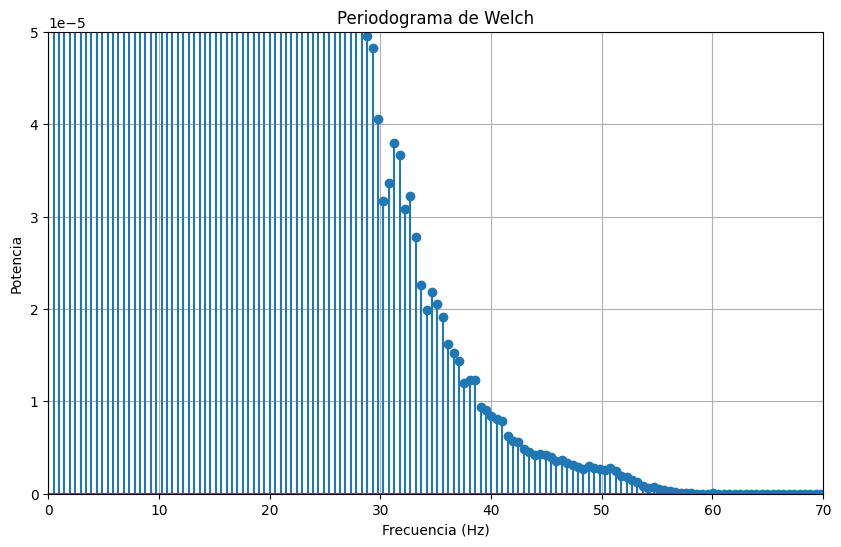

In [55]:
nperseg = 1024 # Ancho de la ventana, nperseg no debe ser mayor que la longitud de la señal
noverlap = int(nperseg / 2)  # Solapamiento de las ventanas del 50%
ventana = np.hanning(nperseg)  # Ventana Hanning
# Calcular el periodograma de Welch
f, power = welch(señal_filtrada, fs, window=ventana, nperseg=nperseg, noverlap=noverlap)

# Se grafica frecuencia vs potencia
plt.figure(figsize=(10, 6))
plt.stem(f, power)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia')
plt.title('Periodograma de Welch')
plt.grid(True)
plt.xlim(0, 70)
plt.ylim(0,0.00005)
plt.show()

Se evidencia que con la aplicación del filtro pasa bajas fue posible eliminar el ruido de la red eléctrica.

### **Grafique un segmento de las señales antes y después de filtrar, analice los cambios.**

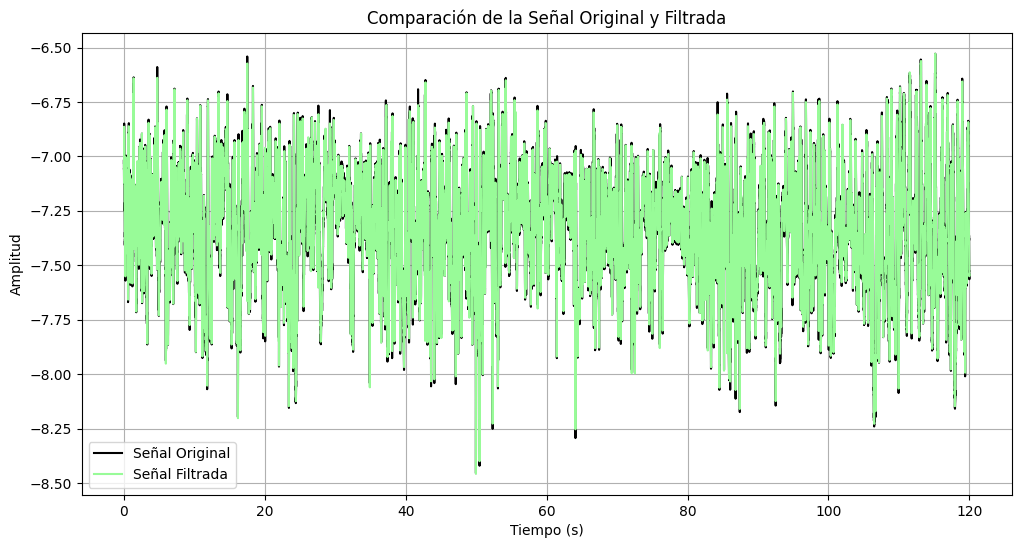

In [58]:
n = np.arange(0, len(senal_C1) / fs, 1 / fs) #Vector de tiempo

plt.figure(figsize=(12, 6))
plt.plot(n, senal_C1, label='Señal Original', color='black')
plt.plot(n, señal_filtrada, label='Señal Filtrada', color='palegreen')
plt.title('Comparación de la Señal Original y Filtrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

Se puede observar que al aplicar el filtro pasa bajas a la señal original, se evidencia una disminución en su amplitud. No obstante, esta disminución es mínima debido a la baja potencia que presentaba el ruido por interferencia eléctrica que fue filtrado, siendo este cambio mínimo. Además, al aplicar el filtro FIR, no se presenta desfase entre la señal de entrada y la señal filtrada.

# **Conclusiones**  

- La aplicación de filtros FIR e IIR en la práctica permitió identificar claramente sus fortalezas y limitaciones, ya que sus diferencias estructurales y de funcionamiento se reflejaron en los resultados del filtrado. Además, se pudo concluir que la elección entre uno u otro depende de las necesidades específicas del sistema y del balance deseado entre precisión en el filtrado y eficiencia computacional.

- Los filtros FIR presentan una menor complejidad debido a que solo emplean el numerador en su implementación. No obstante, cuando se busca mayor precisión en el filtrado, requieren aumentar su orden para obtener una transición más abrupta entre bandas. Esto mejora su desempeño al alterar menos las frecuencias dentro de la banda de paso, pero también incrementa el costo computacional. Aun así, destacan por su estabilidad y por mantener una relación lineal entre fase y frecuencia, lo que evita distorsiones en la señal original.

- En contraste, los filtros IIR logran una alta eficiencia incluso con órdenes más bajos, lo que reduce su complejidad. Sin embargo, tienden a introducir distorsiones en la señal filtrada y presentan menor estabilidad comparados con los filtros FIR.

# **Referencias bibliográficas**  

Referencias bibliográficas

[1] National Instruments, "Aplicación de filtros FIR e IIR", Documentación de Diadem. [En línea ]. Disponible en: IIR Filters and FIR Filters%20filter.)

[2] Sarpal, S. "Diferencia entre filtros IIR y FIR: una guía práctica de diseño". Advsolned. [En línea]. Disponible en: https://www.advsolned.com/difference-between-iir-and-fir-filters-a-practical-design-guide/.

[3] «lfilter — SciPy v1.14.1 Manual». https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html

[4] «filtfilt — SciPy v1.14.1 Manual». https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.filtfilt.html

[5] «iirfilter — SciPy v1.14.1 Manual». https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.iirfilter.html

[6] «firwin — SciPy v1.14.1 Manual». https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.firwin.html